### Questions
- Base on the data provided, What Kind of Business is the company into?
- Analyze the sales performance of the company, and provide insights based on the performance?
- Based on Analysis of the data, What are the potential areas of improvement of the business?
- What are the additional business problems that can be analyzed using this data?


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
df = pd.read_csv('data/retail.csv',  encoding='cp1252')
display(df.head())

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [17]:
display(df.tail())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
532614,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
532615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
532616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
532617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France
532618,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/2011 12:50,4.95,12680.0,France


In [18]:
df.shape

(532619, 8)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    531165 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null object
UnitPrice      532619 non-null float64
CustomerID     397924 non-null float64
Country        532619 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 32.5+ MB


In [27]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

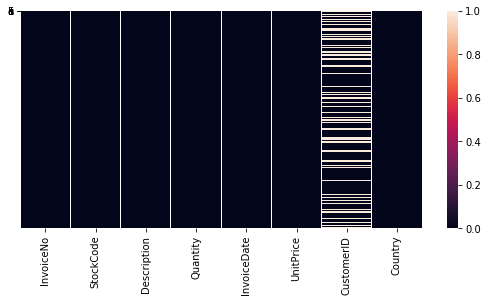

In [35]:
# Using heat determine presence of NAN in the dataset
plt.figure(figsize=(9,4))
sns.heatmap(df.isnull(), yticklabels='False')

In [39]:
# Based on the missing data, Calculate the percentage of missing data in each role to ascertain if to remove or replace
def missing_data(data):
    # Calculate the percentage of missing NAN in each column
    Total = df.isnull().sum().sort_values(ascending = True)
    Percentage = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending = True)
    missing_data = pd.concat([Total, Percentage], axis = 1, keys = ['Total', 'Percentage'])
    return missing_data

missing_data(df)

,Total,Percentage
InvoiceNo,0,0.000000
StockCode,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
Country,0,0.000000
Description,1454,0.272991
CustomerID,134695,25.289184


#### 1. Base on the data provided, What Kind of Business is the company into?

In [155]:
# The customers are from the different Countries
unique_country = df['Country'].unique()

# the figure of the total number of countries
unique_country2 = df['Country'].nunique()

print('The total number of Countries from where we have our customers are {} Countries'.format(df_new['Country'].nunique()))
print('The Countries include the following {}' .format(df['Country'].unique()))

The total number of Countries from where we have our customers are 38 Countries
The Countries include the following ['United Kingdom' 'France' 'Australia' 'Netherlands' 'Germany' 'Norway'
 'EIRE' 'Switzerland' 'Spain' 'Poland' 'Portugal' 'Italy' 'Belgium'
 'Lithuania' 'Japan' 'Iceland' 'Channel Islands' 'Denmark' 'Cyprus'
 'Sweden' 'Finland' 'Austria' 'Bahrain' 'Israel' 'Greece' 'Hong Kong'
 'Singapore' 'Lebanon' 'United Arab Emirates' 'Saudi Arabia'
 'Czech Republic' 'Canada' 'Unspecified' 'Brazil' 'USA'
 'European Community' 'Malta' 'RSA']


#### Base on the unique number of the countries from which customers patronise the business, it is obvious its an online business.

### 2. Analyze the Sales Performance of the company, and provide insights based on the performance?

In [43]:
# Extract the columns needed for the calculation for Sales performance
df_new = df[['CustomerID', 'Quantity', 'UnitPrice', 'InvoiceNo', 'StockCode', 'InvoiceDate', 'Country']]
display(df_new.head())

,CustomerID,Quantity,UnitPrice,InvoiceNo,StockCode,InvoiceDate,Country
0,17850.0,6,2.55,536365,85123A,1/12/2010 8:26,United Kingdom
1,17850.0,6,3.39,536365,71053,1/12/2010 8:26,United Kingdom
2,17850.0,8,2.75,536365,84406B,1/12/2010 8:26,United Kingdom
3,17850.0,6,3.39,536365,84029G,1/12/2010 8:26,United Kingdom
4,17850.0,6,3.39,536365,84029E,1/12/2010 8:26,United Kingdom


In [48]:
# Convert the data type for UnitPrice to an int
df_new['UnitPrice'] = df_new['UnitPrice'].astype('int')

# include total sales column
df_new = df_new.assign(TotalSales = df_new['Quantity']*df_new['UnitPrice'])
display(df_new.head())

,CustomerID,Quantity,UnitPrice,InvoiceNo,StockCode,InvoiceDate,Country,TotalSales
0,17850.0,6,2,536365,85123A,1/12/2010 8:26,United Kingdom,12
1,17850.0,6,3,536365,71053,1/12/2010 8:26,United Kingdom,18
2,17850.0,8,2,536365,84406B,1/12/2010 8:26,United Kingdom,16
3,17850.0,6,3,536365,84029G,1/12/2010 8:26,United Kingdom,18
4,17850.0,6,3,536365,84029E,1/12/2010 8:26,United Kingdom,18


#### Total Number of Product ordered by Countries

In [159]:
# The total number of products ordered by Countries
Country_Qty = df_new.groupby('Country').Quantity.sum().sort_values(ascending=False)
Country_Qty = pd.DataFrame(Country_Qty)
display(Country_Qty.head())

,Quantity
Country,
United Kingdom,4526862
Netherlands,200937
EIRE,147447
Germany,119263
France,112104


#### Show a graph of Total Sales made By Country

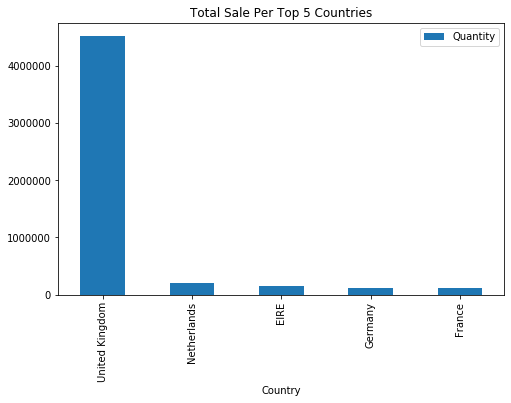

In [165]:
# Sale made by Country
Country_price = df_new.groupby('Country').TotalSales.sum().sort_values(ascending = False)
Country_Qty[:5].plot(kind='bar', title = 'Total Sale Per Top 5 Countries', figsize=(8,5))

In [166]:
# Convert the invoiceDate column to a datetime data type
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])

# split the InvoiceDate column into 2 different column using the date time methods for pandas
df_new['Date'] = df_new['InvoiceDate'].dt.date
df_new['Time'] = df_new['InvoiceDate'].dt.time
df_new['Month'] = df_new['InvoiceDate'].dt.month


# drop column not wanted 
df_new.drop('Times', axis=1, inplace = True)

In [169]:
# Convert the new date column to datetime dtype for ease of plotting
df_new['Date'] = pd.to_datetime(df_new['Date'])

display (df_new.head())

,CustomerID,Quantity,UnitPrice,InvoiceNo,StockCode,InvoiceDate,Country,TotalSales,Date,Time,Month
0,17850.0,6,2,536365,85123A,2010-01-12 08:26:00,United Kingdom,12,2010-01-12,08:26:00,1
1,17850.0,6,3,536365,71053,2010-01-12 08:26:00,United Kingdom,18,2010-01-12,08:26:00,1
2,17850.0,8,2,536365,84406B,2010-01-12 08:26:00,United Kingdom,16,2010-01-12,08:26:00,1
3,17850.0,6,3,536365,84029G,2010-01-12 08:26:00,United Kingdom,18,2010-01-12,08:26:00,1
4,17850.0,6,3,536365,84029E,2010-01-12 08:26:00,United Kingdom,18,2010-01-12,08:26:00,1


In [179]:
df_new.set_index('Date')
display(df_new.head())

,CustomerID,Quantity,UnitPrice,InvoiceNo,StockCode,InvoiceDate,Country,TotalSales,Date,Time,Month
0,17850.0,6,2,536365,85123A,2010-01-12 08:26:00,United Kingdom,12,2010-01-12,08:26:00,1
1,17850.0,6,3,536365,71053,2010-01-12 08:26:00,United Kingdom,18,2010-01-12,08:26:00,1
2,17850.0,8,2,536365,84406B,2010-01-12 08:26:00,United Kingdom,16,2010-01-12,08:26:00,1
3,17850.0,6,3,536365,84029G,2010-01-12 08:26:00,United Kingdom,18,2010-01-12,08:26:00,1
4,17850.0,6,3,536365,84029E,2010-01-12 08:26:00,United Kingdom,18,2010-01-12,08:26:00,1


### Quantity of Products Order By Country

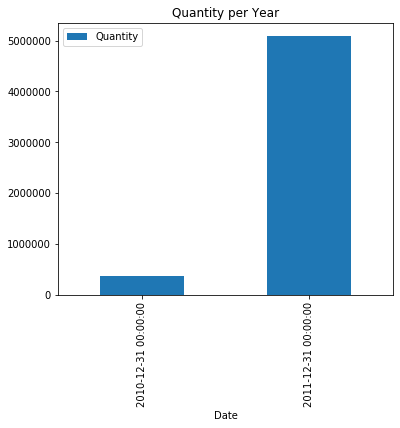

In [172]:
df_new[['Date', 'Quantity']].resample('Y', on ='Date').sum().plot(kind= 'bar', title = 'Quantity per Year', figsize=(6,5))